# Análisis de datos usando pandas

In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import math as mt

# Preguntas de las tablas salarios y lluvias

## Para el caso de los salarios de guanajuato del 2019

In [104]:
salario=pd.read_excel('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/salario/tabulador_pe2019.xls', header= 9)
salario

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.070000,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.660000,760.410000,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.070000,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.660000,760.410000,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.070000,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.660000,760.410000,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.070000,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.660000,760.410000,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
5,18,NaN,SUBSECRETARIO/A A,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
6,18,NaN,DIRECTOR/A GENERAL PARAESTATAL B,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
7,17,NaN,SUBSECRETARIO/A B,36196.185147,5843.070000,1913.1,15006,29739.459369,35311.60,124009.414516,32484.571535,5082.660000,760.410000,85681.772980,10 Días por Año,45 Días por Año
8,17,NaN,DIRECTOR/A GENERAL PARAESTATAL C,36196.185147,5843.070000,1913.1,15006,29739.459369,35311.60,124009.414516,32484.571535,5082.660000,760.410000,85681.772980,10 Días por Año,45 Días por Año
9,16,NaN,SUBSECRETARIO/A C,29462.206543,5621.674080,1913.1,10471,26559.244848,33446.67,107473.895470,26937.769673,4861.264080,760.410000,74914.451718,10 Días por Año,45 Días por Año


In [105]:
print(salario.keys())

Index(['NIVEL', 'TIPO', 'PUESTO', 'SUELDO BASE', 'CUOTAS SEGURIDAD SOCIAL',
       'PREVISIÓN SOCIAL', 'AYUDA X SERVICIOS', 'APOYO FAMILIAR',
       'GRATIFICACIÓN QUINCENAL', 'SUELDO MENSUAL BRUTO', 'IMPTO MENSUAL',
       'ISSEG', 'ISSSTE', 'SUELDO MENSUAL NETO', 'PRIMA VACACIONAL',
       'AGUINALDO'],
      dtype='object')


In [106]:
salario.describe() # Proporciona una primera aproximación a la información que necesitamos

,NIVEL,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO
count,79.000000,79.000000,79.000000,7.900000e+01,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,8.670886,14427.528244,2551.057005,1.913100e+03,4224.316456,13095.416510,13255.957722,49467.375935,11086.965356,2178.762464,372.294541,35829.353574
std,5.658489,12639.319936,1887.367119,4.576531e-13,5917.564742,12561.423626,16283.009818,48932.415025,14333.022606,1632.291459,257.338508,32902.782725
min,1.000000,3080.400000,600.678000,1.913100e+03,450.000000,1572.330000,0.000000,7616.508000,263.883632,508.266000,92.412000,6751.946368
25%,4.000000,4564.185105,890.016096,1.913100e+03,450.000000,3599.725827,936.540000,12353.567028,1173.958791,753.090542,136.925553,10289.592141
50%,8.000000,9458.572628,1844.421662,1.913100e+03,1012.000000,8611.753511,6545.820000,28148.204516,4414.420662,1560.664484,283.757179,22078.225282
75%,13.000000,22680.796123,4422.755244,1.913100e+03,4906.000000,16798.836156,19519.330000,70240.817524,15454.848684,3742.331360,680.423884,50363.213596
max,22.000000,59804.327930,5843.070000,1.913100e+03,25897.000000,64294.837780,75373.990000,233126.325711,69584.321342,5082.660000,760.410000,157698.934369


### -¿Cuál es promedio de las contribuciones del sueldo de un trabajador en esta dependencia?


Para el promedio de las contribuciones del sueldo del sueldo de un trabajador

In [107]:
media_bruto=salario['SUELDO MENSUAL BRUTO'].mean()      # salario.describe()['SUELDO MENSUAL BRUTO'].mean() 
                                              ## Son diferentes los valores encontrados en la tabla con el mostrado aqui
                                              #por agregar el describe
media_bruto

49467.3759351061

In [108]:
media_neto=salario['SUELDO MENSUAL NETO'].mean()
media_neto

35829.35357437968

In [109]:
y=media_bruto-media_neto #La diferencia entre la media del el sueldo bruto y el neto nos dará cuanto contribuyo en promedio el trabajador.

y

13638.02236072642

In [110]:
media_prevsocial=salario.describe()['PREVISIÓN SOCIAL'].mean() #Con esto observamos que esta función no esta definiendo de forma correcta
                                              #el valor correcto se obtiene al eliminar el describe
    


media_prevsocial

1444.7000000000003

In [111]:
49467.37- 35829.35  ##Valores de la tabla describe
                    # Así la diferencia entre estos salarios será:

13638.020000000004

### -¿Media y  Moda de las contribuciones del sueldo de un trabajador ? Rango interquartil de la distribución. 


In [112]:
# Media de sueldo bruto = 49467.37
# Media de sueldo neto  = 35829.35 

mod_net=salario['SUELDO MENSUAL NETO'].mode()
mod_net

0    8294.835952
1    9609.786902
dtype: float64

In [113]:
mod_brut=salario['SUELDO MENSUAL BRUTO'].mode()
mod_brut

0     9783.850296
1    11440.563407
dtype: float64

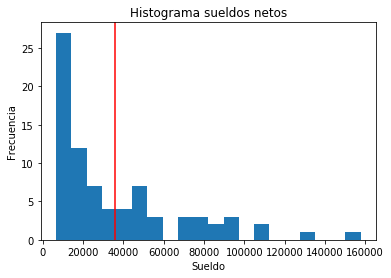

In [114]:
plt.hist(salario['SUELDO MENSUAL NETO'], bins=20)

plt.axvline(35829.35357437968, color='red')

plt.title('Histograma sueldos netos')
plt.xlabel('Sueldo')
plt.ylabel('Frecuencia')
plt.show()

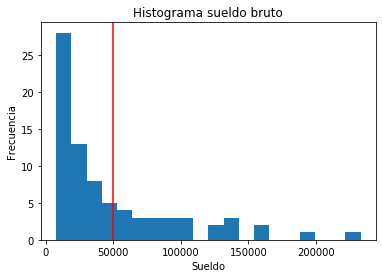

In [115]:
plt.hist(salario['SUELDO MENSUAL BRUTO'], bins=20)
plt.axvline(49467.3759351061, color='red')
plt.title('Histograma sueldo bruto')
plt.xlabel('Sueldo')
plt.ylabel('Frecuencia')
plt.show()


### -¿Cuál es la dispersión de sueldos?

In [116]:
media_neto

35829.35357437968

In [117]:
mediana_neto=salario['SUELDO MENSUAL NETO'].median()
mediana_neto

22078.22528193275

In [118]:
np.abs(salario['SUELDO MENSUAL NETO']- media_neto)

0     121869.580795
1      97109.845468
2      72204.132876
3      72204.132876
4      60519.737071
          ...      
74     28332.187067
75     29077.407206
76     29077.407206
77     29077.407206
78     29077.407206
Name: SUELDO MENSUAL NETO, Length: 79, dtype: float64

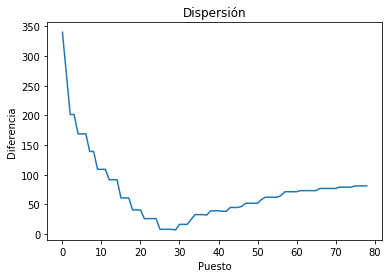

In [137]:
plt.plot((((np.abs(salario['SUELDO MENSUAL NETO']- media_neto))/media_neto))*100)
#plt.axvline(49467.3759351061, color='red')
plt.title('Dispersión')
plt.xlabel('Puesto')
plt.ylabel('Diferencia')
plt.show()

### -¿Cuál es el sueldo base máximo? 

In [131]:
max_neto=salario['SUELDO MENSUAL NETO'].max()
max_neto

157698.9343690769

In [121]:
salario['SUELDO MENSUAL BRUTO'].max()

233126.32571072254

### -¿Cuál es el sueldo base mínimo?

In [122]:
salario['SUELDO MENSUAL BRUTO'].min()

7616.508

In [123]:
min_neto=salario['SUELDO MENSUAL NETO'].min()
min_neto

6751.946368

In [124]:
dif=salario['SUELDO MENSUAL NETO'].max()- salario['SUELDO MENSUAL NETO'].min()
dif

150946.98800107688

### -Porcentaje relativo de cada una de las componentes del sueldo mensual neto en cada uno de los puestos

### -¿De cuánto dinero es la diferencia entre el sueldo neto mayor (gobernador del estado) y el sueldo de otros empleados (por ejemplo, alguien de nivel 1, que es el nivel más bajo en la tabla)?

In [125]:
x= np.abs(salario['SUELDO MENSUAL NETO'].max()- salario['SUELDO MENSUAL NETO'])

x

0          0.000000
1      24759.735327
2      49665.447919
3      49665.447919
4      61349.843724
          ...      
74    150201.767861
75    150946.988001
76    150946.988001
77    150946.988001
78    150946.988001
Name: SUELDO MENSUAL NETO, Length: 79, dtype: float64

In [126]:
Dif= pd.DataFrame({"Puesto": salario['PUESTO'], "Diferencia": x})
Dif

,Puesto,Diferencia
0,GOBERNADOR/A DEL ESTADO,0.000000
1,SECRETARIO/A DE ESTADO A,24759.735327
2,DIRECTOR/A GENERAL PARAESTATAL A,49665.447919
3,SECRETARIO/A DE ESTADO B,49665.447919
4,SECRETARIO/A DE ESTADO C,61349.843724
5,SUBSECRETARIO/A A,61349.843724
6,DIRECTOR/A GENERAL PARAESTATAL B,61349.843724
7,SUBSECRETARIO/A B,72017.161389
8,DIRECTOR/A GENERAL PARAESTATAL C,72017.161389
9,SUBSECRETARIO/A C,82784.482651


### -¿Qué porcentaje se da de apoyo en sus diferentes modalidades para cada uno? y  ¿Cuanto dinero es gastado en es ISSSTE entre todos los puestos?

In [127]:
ap= salario['CUOTAS SEGURIDAD SOCIAL']+ salario['PREVISIÓN SOCIAL']+ salario['AYUDA X SERVICIOS'] +salario['APOYO FAMILIAR'] + salario['GRATIFICACIÓN QUINCENAL']
ap

0     173321.997780
1     146585.629699
2     117189.695456
3     117189.695456
4     103088.308404
          ...      
74      5420.227944
75      4536.108000
76      4536.108000
77      4536.108000
78      4536.108000
Length: 79, dtype: float64

In [128]:
Porc_apoy= pd.DataFrame({"Puesto": salario['PUESTO'], "%Apoyos": (ap/salario['SUELDO MENSUAL BRUTO'])*100})
Porc_apoy

,Puesto,%Apoyos
0,GOBERNADOR/A DEL ESTADO,74.346815
1,SECRETARIO/A DE ESTADO A,74.937094
2,DIRECTOR/A GENERAL PARAESTATAL A,74.229115
3,SECRETARIO/A DE ESTADO B,74.229115
4,SECRETARIO/A DE ESTADO C,73.544143
5,SUBSECRETARIO/A A,73.544143
6,DIRECTOR/A GENERAL PARAESTATAL B,73.544143
7,SUBSECRETARIO/A B,70.811744
8,DIRECTOR/A GENERAL PARAESTATAL C,70.811744
9,SUBSECRETARIO/A C,72.586639


In [129]:
salario['ISSSTE'].sum()

29411.26871446277

In [134]:
General= pd.DataFrame({"Sueldo máximo":max_neto, "Sueldo mínimo":min_neto,  "Rango": dif, "Media":media_neto, "Moda": mod_net,"Mediana": mediana_neto})         
General

,Sueldo máximo,Sueldo mínimo,Rango,Media,Moda,Mediana
0,157698.934369,6751.946368,150946.988001,35829.353574,8294.835952,22078.225282
1,157698.934369,6751.946368,150946.988001,35829.353574,9609.786902,22078.225282


## Temperaturas y presipitaciones

In [80]:
Tem_min_2018=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2018/tem_min/201801010000TMin.csv', encoding='latin-1')
Tem_max_2918=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2018/tem_max/201801010000TMax.csv', encoding='latin-1')
Tem_med_2018=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2018/temp_media/201801010000TMed.csv', encoding='latin-1')
lluv_2018=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2018/precip/201801010000Lluv.csv', encoding='latin-1')
                        
Tem_min_2019=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2019/tem_min/201901010000TMin.csv', encoding='latin-1')
Tem_max_2919=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2019/tem_max/201901010000TMax.csv', encoding='latin-1')
Tem_med_2019=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2019/temp_media/201901010000TMed.csv', encoding='latin-1')
lluv_2019=pd.read_csv('/Users/stefany/Desktop/analisis_datos/da2019-Stefany2889/datos/Lluvias/2019/precip/201901010000Lluv.csv', encoding='latin-1')

In [138]:
lluv_2018[4:20:2]

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE
4,-102.197222,22.007222,AGS,CHOAG,"Cañada Honda, Ags.",17.2
6,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5
8,-102.788333,21.807500,AGS,MNLAG,"Media Luna, Ags.",48.9
10,-102.290556,21.850833,AGS,OBSAG,"Observatorio, Ags.",20.9
12,-101.966667,21.916667,AGS,PALAG,"Palo Alto, Ags.",19.0
14,-102.417222,22.141111,AGS,PECAG,"Calles, Ags.",50.0
16,-102.437500,22.235000,AGS,PTRAG,"Potrerillos, Ags.",52.8
18,-102.127778,21.807778,AGS,TNJAG,"La Tinaja II, Ags.",10.0


In [139]:
lluv_2019[4:20:2]

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70
6,-102.189167,21.826667,AGS,CLVAG,"Calvillo, Ags.",9.20
8,-102.296667,22.362778,AGS,CSOAG,"Cosío, Ags.",7.20
10,-102.788333,21.807500,AGS,MNLAG,"Media Luna, Ags.",24.30
12,-102.001944,22.020556,AGS,NVLAG,"El Novillo, Ags.",15.50
14,-102.465000,22.189167,AGS,P50ANIV,"Presa Cincuenta Aniversario, Ags. SMN*",10.40
16,-102.291944,22.162500,AGS,PBLAG,"Pabellón, Ags.",6.80
18,-102.133333,22.202778,AGS,PTOAG,"Puerto de la Concepción, Ags.",11.53


In [ ]:
lluv_en2018=lluvias_en2018.rename(columns={"ESTADO":"EDO"})